---
author: Aisaiah Pellecer
date: October 23 2024
embed-resources: true
code-fold: true
---

## **Can we understand the state of Immigration in Chicago through local news text networks?**

[Google Colab](https://colab.research.google.com/drive/1tnrCS6Gma-2YnPjlsraUHO9P1d-lbFcm?usp=sharing)


### **Motive** 

In the past, I worked in a public office, where, like many interns, I engaged in casework, legislative support, and communications. These three areas form the core functions in most congressional offices, though their specific organization can vary depending on the member's role and responsibilities. Among these, legislative work is central, but communications also plays a crucial role in bridging the gap between the district and the office. This means the office must stay informed about local news to stay in touch with its constituents.

While congressional offices have teams dedicated to tracking this information, the sheer volume of updates presents challenges. For this experiment, I propose using text networks to explore how technology could enhance the work of communications teams or an active constituent by streamlining news ingestion.

I’ve chosen the communications team because the local information they handle is generally low-risk and straightforward to verify, making it ideal for testing new approaches.

Since this is an experimental project exploring the potential of technology in a public office setting, I am examining the following key questions: **Can text networks inform us about current news? Are text networks reliable? Is this a technology we ought to use, or should the work be done by research services?**

## **What are Text Networks?**

![Connected Topics Clusters: https://noduslabs.com/cases/conference-talks-content-profiling-text-network-analysis/](https://noduslabs.com/wp-content/uploads/2015/07/connected-topics-clusters-text-network-analysis.jpg)

Since text networks are the foundation of this exploration, it is important to look into the specifics of their creation and understand why they may be valuable within public office. As the visualization illustrates, text networks can represent the relationships and interactions among different textual entities (e.g. words, phrases, titles). In this sense, they are no different from any other network in their ability to generate insights regarding patterns and significant themes [^3].

At the core of text networks is the concept of nodes and edges. Nodes represent the key elements of the text, such as individual words or concepts, while edges illustrate the relationships or co-occurrences between these nodes. 

For example, in a network derived from news articles, a **node** might represent the term "immigration," and an **edge** might connect it to related terms like "refugees," "community," or "policy," reflecting how frequently these terms appear together within the text. 

This is particularly powerful when applied 
to large corpuses (collections) of text, where manual analysis would be time-consuming. Text networks-- and their various metrics to quantify relationships--enable the examination of not just individual documents but also the overall landscape of discourse surrounding a specific topic. 

### **Chicago Migrant Crisis**

Naturally, as the third-largest city in the United States and a sanctuary city, Chicago was home to an immigrant population of 1.7 million as of the 2018–2022 period.[^1] Since 2022, however, it has welcomed over 50,000 new arrivals, facing an unexpected wave of migrants without sponsorship.[^2] Initially, the city was unprepared to manage the influx of bused migrants, making it a priority for public officials to address the crisis—particularly concerning housing, ensuring adequate shelter, and responding to community concerns about the situation.

The early period of busing was a key time when officials needed to gauge public sentiment to understand the effects of rapid sheltering and to ensure coherence and dignity for all involved. In this project, I aim to explore this exact topic, modeling how text networks can yield insights during evolving events when public sentiment must be measured—using news media as a tool to assess this potential. 

By analyzing how terms related to the migrant crisis interconnect within news articles, policymakers and communications teams can gain a clearer understanding of public sentiment and media framing. 



### **Developing a Text Network of Immigration news in Chicago**

#### **Data**
To address this question, I have created web scrapers to collect headlines from the immigration sections of two news media outlets: [South Side Weekly](https://southsideweekly.com/category/immigration-2/) and [Borderless Magazine](https://borderlessmag.org/category/immigration-policy/). Both of these local outlets provide significant coverage of immigration issues in Chicago. In this experiment, they serve as public voices, reflecting their independent grassroots status—unlike a source such as Fox News Chicago, which would likely yield different results.

Ideally, the best approach for extracting news report headings would be through an API request, which is a safe and ethical method. However, given the niche nature of the information I'm seeking, a web scraper proves to be the most effective tool, allowing me to precisely define the patterns of information I want to extract from a given webpage. 

Since this is public information, web scraping is generally legal, and neither source has any statements in their privacy policies that prohibit it. To be cautious, I will provide just the script I used to web scrape. This will give you recent information, but I will leave the interpretation of the data to you. As of now, I am web scraping on October 20th, 2024.

**Note: The primary purpose of this reading is to evaluate the feasibility of using text networks to gain insights into public and media sentiment on immigration in Chicago. For transparency, I will include the web scraping code to allow reproduction of the analysis, not as a tutorial.**

**Here's a simple breakdown of my webscraping processing:**

1. Extract Data via Web Scraping
2. Prepare and Transform Data



**Extract Data via Web Scraping**

In this section, I will quickly walk through the process of web scraping about 30 articles (in total) from South Side Weekly and Borderless Magazine. The goal is to extract relevant data from these sites, such as article titles, urls, while also generating a unique ID for each article.

In [ ]:
!pip install textnets
!pip install langdetect

In [23]:
# Imports
import requests
import csv
import pandas as pd
from collections import Counter
from lxml import html
from bs4 import BeautifulSoup
from langdetect import detect
import hashlib
from textnets import Corpus, Textnet
import textnets as tn
from datetime import datetime

In [24]:
def generate_unique_id(comment):
    unique_string = comment
    unique_hash = hashlib.sha256(unique_string.encode()).hexdigest()
    unique_id = unique_hash[:6]  # truncate the unique id to 6 characters
    return str(unique_id)


def south_side_weekly_extraction():
    main_pages = []
    for i in range(3):
        if i == 1:
            main_pages.append("https://southsideweekly.com/category/immigration-2/")
        if i >= 2:
            next_page = (
                "https://southsideweekly.com/category/immigration-2/page/"
                + str(i)
                + "/"
            )
            main_pages.append(next_page)
    data_list = []

    for page in main_pages:
        # Looping the through the immigration section pages and collecting the article titles and links
        url = page
        page = requests.get(url)
        tree = html.fromstring(page.content)
        # Article Entry Title Text
        titles = tree.xpath('//h2[@class="entry-title"]/a[@rel="bookmark"]/text()')
        # Article Link
        links = tree.xpath('//h2[@class="entry-title"]/a[@rel="bookmark"]/@href')
        times = tree.xpath(
            '//div/div[@class="entry-meta"]/span[@class="posted-on"]/a/time[1]'
        )
        # print(times)
        for i, title in enumerate(titles[:15]):
            article_link = links[i]

            date_time = times[i].get("datetime")
            date_time = datetime.fromisoformat(date_time).strftime("%Y-%m-%d")

            # print(article_link,date_time)
            unique_id = generate_unique_id(title.strip().lower())
            data_list.append(
                (unique_id, title.strip().lower(), date_time, article_link)
            )
    return pd.DataFrame(data_list, columns=["id", "title", "date", "link"])

**How does the `south_side_weekly_extraction()` function work?**

1. **Generate Links to Main Pages of the Immigration Section**: The function first generates links to the main pages of the Immigration section, which contain the article titles. These pages generally follow the URL structure `'https://southsideweekly.com/category/immigration-2/page/2/'`, where the '/page/2/' portion references the second page of the section. To collect URLs for additional main pages, we modify the page number in this URL pattern.

2. **Extract Titles and Links from Main Pages**: In the second `for` loop, we iterate through each main page link, extracting the titles and links of individual articles. Using `requests`, we retrieve the entire HTML structure of each main page. Although this HTML can be complex, we locate the desired text or references by identifying their specific XPath. Using the `lxml` library’s `tree` module, we extract all matches from the HTML tree. The extracted titles, dates, and links are then stored in `data_list`, which is subsequently converted into a pandas `DataFrame` with a unique identifier for each entry.

In [25]:
def borderless_extraction():
    main_pages = [
        "https://borderlessmag.org/category/immigration-policy/",
        "https://borderlessmag.org/category/immigration-policy/page/2/",
    ]

    data_list = []
    for page in main_pages:
        # data_dict = {}
        url = page
        page = requests.get(url)
        tree = html.fromstring(page.content)
        titles = tree.xpath("//div/div/div/div[2]/div[1]/h3/a/text()")
        links = tree.xpath("//div/div/div/div[2]/div[1]/h3/a/@href")

        for i, title in enumerate(titles[:15]):
            unique_id = generate_unique_id(title)
            article_link = links[i]

            date_time = html.fromstring(requests.get(article_link).content).xpath(
                '//*[@id="single-below-header"]/span[@class="meta-date date published"]/text()'
            )
            if len(date_time) == 0:
                date_time = html.fromstring(requests.get(article_link).content).xpath(
                    '//*[@id="single-below-header"]/span[@class="meta-date date updated"]/text()'
                )
            date_time = datetime.strptime(date_time[0], "%B %d, %Y").strftime(
                "%Y-%m-%d"
            )
            data_list.append(
                (unique_id, title.strip().lower(), date_time, article_link)
            )
    return pd.DataFrame(data_list, columns=["id", "title", "date", "link"])

**How does the `borderless_extraction()` function work?**

This function is similar to the previous where in using a list of base urls, we are able to request the content of the pages, using `requests` and use lmxl xpath patterns to extract the features that we want. In this case we are also looking for the article titles, their links, publish dates embedded in their links, and then generating a unique ID based on the title using hashlib.


**Prepare Data**

In this section, the transformation and preparation steps taken to ensure the data is ready for text network analysis are outlined.

The process begins with concatenating data extracted from both media outlets into a primary DataFrame (`main_df`), which is then sorted by date in descending order to prioritize the most recent information. This chronological organization is essential for understanding current public and media sentiment on key immigration topics, as it enables easy parsing and relevance-based analysis of article titles.

In [47]:
borderless_df = borderless_extraction()
ss_df = south_side_weekly_extraction()
main_df = pd.concat([ss_df, borderless_df], ignore_index=True)
main_df = main_df.sort_values(by="date", ascending=False).reset_index(drop=True)
main_df.head(3)

,id,title,date,link
0,4154c5,‘the fear cut through my family’: alarm over t...,2024-11-04,https://southsideweekly.com/the-fear-cut-throu...
1,fe650c,where harris and trump stand on the border and...,2024-10-29,https://borderlessmag.org/2024/10/29/president...
2,655e2d,‘the home i worked to make: voices from the ne...,2024-10-22,https://borderlessmag.org/2024/10/22/syrian-no...


This outlines the steps taken to ensure the dataset is optimized for analysis relevant to communication teams and constituents. Puplicate entries are removed, and the `langdetect` library is utilized to verify that all text is in English, as the `Textnet` library relies on tokenization (decomposing words in titles) to construct the network. 

Article titles are designated as the primary variable for analysis, with consistent English language necessary across all entries. 

Furthermore, the main DataFrame, referred to as `main_df`, is transformed and a copy is created, named `corpus_sample`. In this new DataFrame, the title field is duplicated and set as the index, which serves as the foundation for the `Textnet` library’s interpretation and network construction.

In [49]:
key_var = "title"
for i, row in enumerate(main_df[key_var]):
    if detect(row) != "en":
        main_df = main_df.drop(index=i, axis=0)
    else:
        continue

main_df = main_df.drop_duplicates(subset=[key_var]).reset_index(drop=True)
corpus_sample = main_df.copy(deep=True)
corpus_sample["title_index"] = corpus_sample.loc[:, key_var]
corpus_sample.set_index("title_index", inplace=True)

corpus_sample.head(3)

,id,title,date,link
title_index,,,,
‘the fear cut through my family’: alarm over trump’s potential return sparks deep anxiety among chicago immigrants,4154c5,‘the fear cut through my family’: alarm over t...,2024-11-04,https://southsideweekly.com/the-fear-cut-throu...
where harris and trump stand on the border and other immigration policies,fe650c,where harris and trump stand on the border and...,2024-10-29,https://borderlessmag.org/2024/10/29/president...
‘the home i worked to make: voices from the new syrian diaspora’,655e2d,‘the home i worked to make: voices from the ne...,2024-10-22,https://borderlessmag.org/2024/10/22/syrian-no...


### **Main Analysis and Review: Are Text Networks Sufficient?**

This section outlines the analytical process of using the `Textnet` library for text network analysis, aimed at addressing the key questions identified earlier.

The analysis begins by creating a corpus (collection of text) from the key variable, the title of each article. Once extracted, the corpus is tokenized to ensure that all information integrated into the text model is accurately processed. This tokenization enables a comprehensive projection of the data, representing all clusters effectively. Below is a visualization of all article titles within the DataFrame, forming the basis of this analysis.

C:\Users\issap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


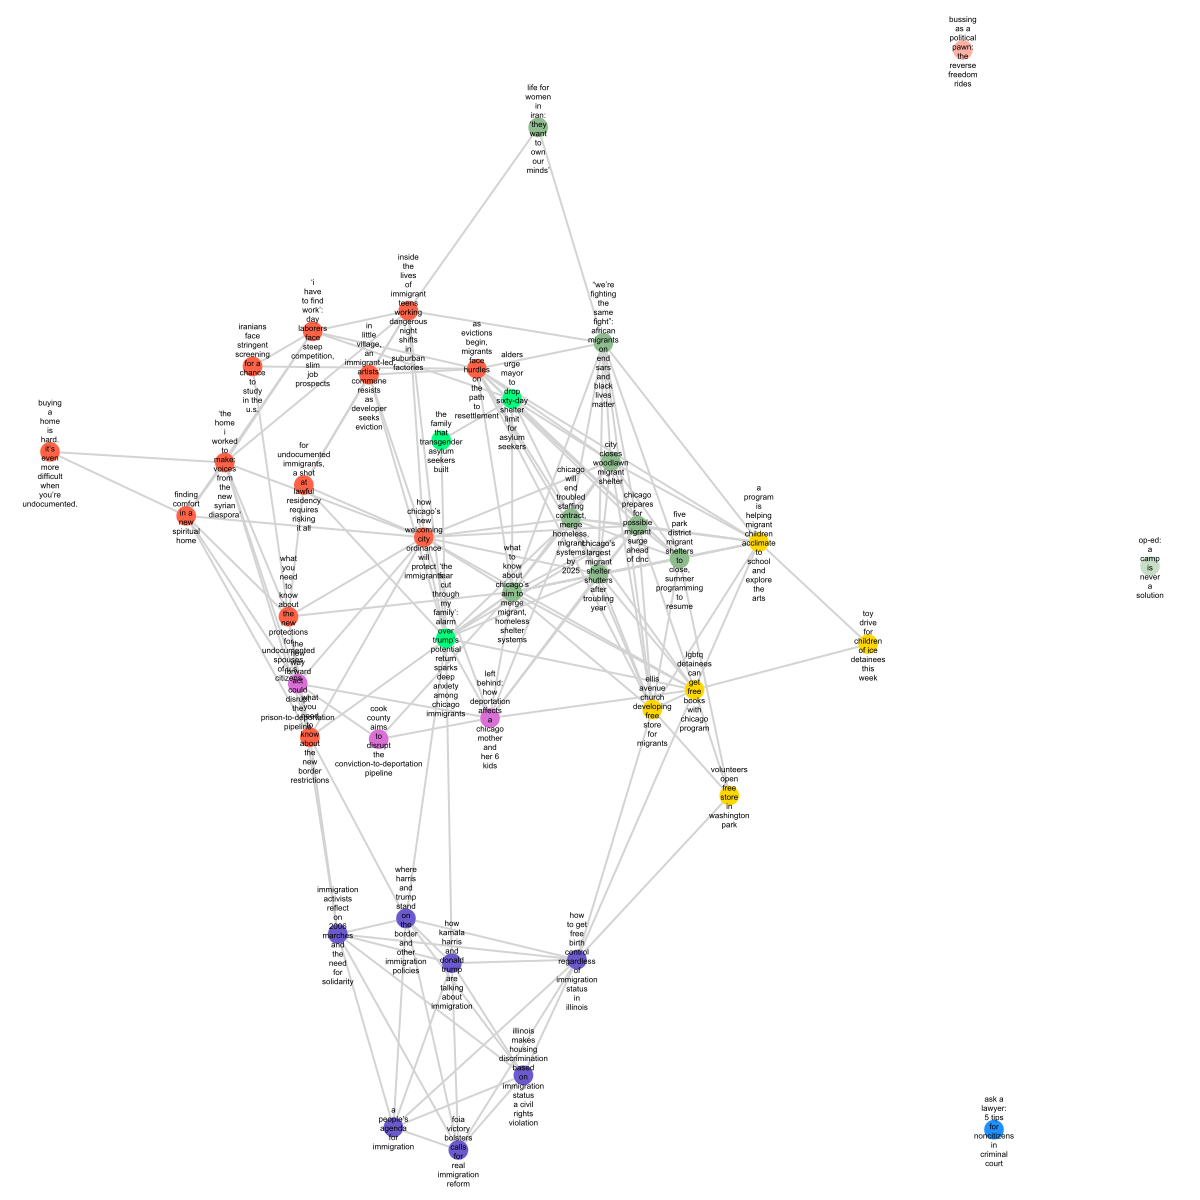

In [52]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

corpus = Corpus(corpus_sample[key_var])
corpus
tokens = corpus.tokenized(stem=True, lower=False)

t = tn.Textnet(corpus.tokenized(), min_docs=1)

article_network = t.project(node_type=tn.DOC)

article_network.plot(
    label_nodes=True,
    node_label_size=8,
    node_shape="o",
    color_clusters=True,
    target="immigration_title_network.png",
    bbox=(1200, 1200),
)

From the simple visualization, we can see all the different groupings represented by the text network. Of course, it is a bit difficult to read, especially in areas where there is overlap among the texts, but additional rendering efforts could contribute to a more concrete and easily interpretable visualization. 

From this view, you can see various sections, such as those related to the legality of immigration, the current status of immigrants on a more personal level as opposed to a legal level, and another section related to shelters. In addition, there are residual sections represented by the network groupings.

Now, if I were working within a public office, I think there is some benefit in being able to see these large groups. As you can see, with the color coordination, it's easier to identify the main groups and distinguish them from the residual voices or discourse related to immigration

In [53]:
article_network.top_cluster_nodes()

,nodes,size
cluster,,
0,[what you need to know about the new protectio...,12
1,[what to know about chicago’s aim to merge mig...,8
2,[illinois makes housing discrimination based o...,7
3,[lgbtq detainees can get free books with chica...,5
4,[the new way forward act could disrupt the pri...,3
5,[the family that transgender asylum seekers bu...,3
6,ask a lawyer: 5 tips for noncitizens in crimin...,1
7,bussing as a political pawn: the reverse freed...,1
8,op-ed: a camp is never a solution,1


You can see from this data table what the top cluster nodes are within each group. In this table, the size of a node is represented by the number of links it has. Therefore, if you were working in a public office, you could look at the largest nodes to determine the common language or discourse regarding immigration, and identify specific articles that represent this discourse. Thus, it can be used to identify a top article within a cluster community[^4]. 

By using this simple table, you could look into further analysis of the topic, using it as a starting point. While it may not directly inform the legislative aspects of a team, it can serve as a kind of radar to gauge the latest buzz and discussions.

### Visualization of Terms

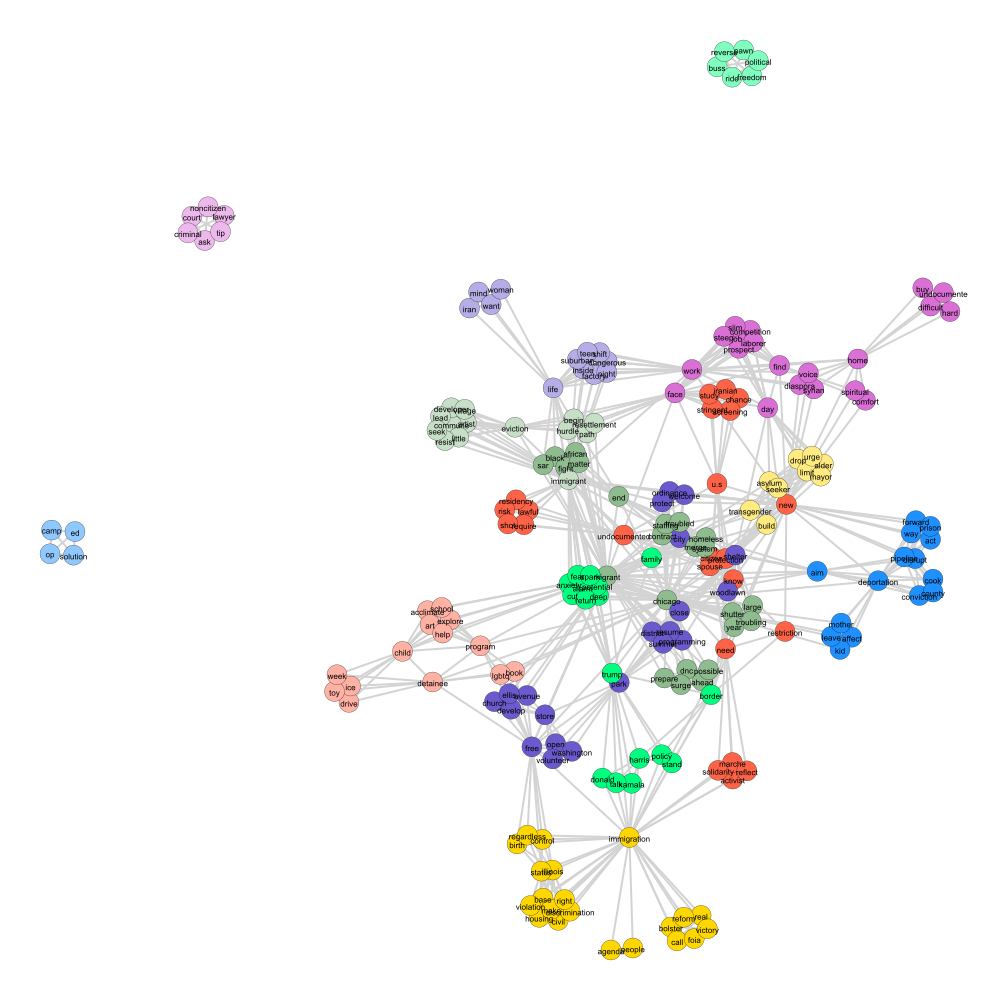

In [51]:
article_network = t.project(node_type=tn.TERM)

article_network.plot(
    label_nodes=True,
    node_label_size=8,
    node_shape="o",
    color_clusters=True,
    target="immigration_title_network_terms.png",
    bbox=(1000, 1000))

Much like the other visualization, this method can also be employed within public offices to understand the structure of the network. In this instance, we are just looking at term-to-term connections to identify associations between certain words. For example, as we can see from this visualization, if we focus on the term 'immigration,' we can observe its connections to words such as 'rights,' 'housing,' 'control,' 'policy,' 'Kamala,' and 'solidarity,' among others. Further analysis of these terms, if not already apparent, can be used to understand sentiment."

#### **Overview and Key Considerations**

This visualization examines the network of words derived from the titles of approximately 30 recent articles published by *South Side Weekly* and *Borderless Magazine*. The goal is to address some of the main questions posed at the beginning of this analysis while acknowledging the limitations of the text processing used to build the network.

The text network was created by tokenizing words within each article title and drawing connections between article nodes based on shared tokens. This approach highlights linguistic similarities across articles, potentially revealing trending topics in news media. However, it’s important to distinguish that these "tokens" do not necessarily represent *keywords*, as they may include less significant words that contribute to network "noise." This noise arises because edges (connections) are formed based solely on the presence of common tokens, not necessarily the most meaningful or distinctive ones.
 

A qualitative review is crucial to extracting useful insights from this visualization. Communication teams in public offices, for example, could use this to identify the most prominent topics at a glance, with clustered articles indicating shared themes. For a more in-depth understanding, teams may consider reviewing articles within specific clusters to determine topic popularity or prevalence.

The visualization suggests the presence of roughly three primary topic clusters, with additional smaller clusters representing more unique or less related articles. This clustering can effectively capture the evolution of major topics but may also risk overlooking smaller, potentially critical issues. This limitation could inadvertently encourage a focus on sensational or lingering topics, possibly at the expense of nuanced or emerging issues that deserve attention.


### Conclusion

**Can we understand the state of immigration in Chicago using text networks? Yes, but only to a degree.**

Would this work within the scope of a public office's communication team? Honestly, no. While we’ve established a lot from reviewing the visualization of terms within the text network and examining the relationships between article headings and word associations, it's important to recognize the limitations. Legislative and public offices need to rely on consistent information that isn't overly influenced by residual or superficial data. 

One major limitation is that this analysis only looks at titles. If we were to dive into the substantive discourse on immigration in Chicago, we’d need to consider the weight of the language used by the media, which is intended to capture attention. Futhermore, this approach is too limited. Relying on such brief snippets—like five- or ten-word titles—could lead us to inherit the biases embedded in those headlines. Using this as a foundation for policymaking, communication strategies, or outreach would be problematic.

While this example shows how text networks can be useful in public offices for gaining a general understanding of topics and public discourse, further development is necessary. Specifically, expanding the analysis to include a more comprehensive corpus of text would be crucial. So, while this tool does a good job of providing a snapshot of public discourse on immigration in Chicago, it falls short in informing policy-making, communication strategy, or addressing key issues effectively. Therefore, while I applaud its performance in this specific context, implementing something like this in real life would require significant refinement.[^5]

## Sources:

[^1]: [Migration Policy Institute. 2024. "Frequently Requested Statistics on Immigrants and Immigration in the United States." Migration Policy Institute. https://www.migrationpolicy.org/article/frequently-requested-statistics-immigrants-and-immigration-united-states-2024](https://www.migrationpolicy.org/article/frequently-requested-statistics-immigrants-and-immigration-united-states-2024)
[^2]: [City of Chicago. n.d. "Dashboard for Texas New Arrivals." City of Chicago. https://www.chicago.gov/city/en/sites/texas-new-arrivals/home/Dashboard.html.](https://www.chicago.gov/city/en/sites/texas-new-arrivals/home/Dashboard.html)
[^3]: [Barabási, Albert-László. 2016. "Chapter 1: The Societal Impact of Networks." In Network Science. https://networksciencebook.com/chapter/1#societal-impact.](https://networksciencebook.com/chapter/1#societal-impact)
[^4]: [Textnets. "Tutorial." Last modified 2024. Accessed November 4, 2024. https://textnets.readthedocs.io/en/stable/tutorial.html](https://textnets.readthedocs.io/en/stable/tutorial.html)

[^5]: [Chat GPT 4.0, Prompt 1: “Correct the grammar of the text above,” October 31st, 2024](https://chatgpt.com/)